<a href="https://colab.research.google.com/github/uumami/workshop_riskmathics/blob/main/riskmathics_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Para refrescar la memoria


[What Is Statistics: Crash Course Statistics #1](https://www.youtube.com/watch?v=sxQaBpKfDRk&list=PLH2l6uzC4UEW3iJO4T0qUeUEp_X-f1U7S&index=2)

[Mathematical Thinking: Crash Course Statistics #2](https://www.youtube.com/watch?v=tN9Xl1AcSv8&list=PLH2l6uzC4UEW3iJO4T0qUeUEp_X-f1U7S&index=3)

[Regression: Crash Course Statistics #32](https://www.youtube.com/watch?v=WWqE7YHR4Jc&t=517s)

[Fitting Models Is like Tetris: Crash Course Statistics #35](https://www.youtube.com/watch?v=QdmG6uUtB4o&list=PLH2l6uzC4UEW3iJO4T0qUeUEp_X-f1U7S&index=36)  

[Supervised Machine Learning: Crash Course Statistics #36](https://www.youtube.com/watch?v=jmLid2x9eKg&list=PLH2l6uzC4UEW3iJO4T0qUeUEp_X-f1U7S&index=37)

# Introduccion a ML

In [1]:
import numpy as np
import pandas as pd
# ### Graficas
import matplotlib.pyplot as plt
import seaborn as sns

# ### Regresion Lineal
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Aproximacion de f

In [2]:
def foo_regresion(X,Y):

    # ### Regresion lineal
    regresion = linear_model.LinearRegression()

    # Entrenamiento
    regresion.fit(X,Y)

    # Predicciones
    Y_hat = regresion.predict(X)
    
    # Error
    error = np.sqrt(np.square(np.subtract(Y_hat,Y))) 
    df = pd.DataFrame(data={'Y_hat':Y_hat, 'Y':Y})
    
    # ## Plots
    X_plot = np.linspace(Y.min(), Y.max(), 100)
    Y_plot = X_plot
    g = sns.FacetGrid(df, size = 6)
    g = g.map(plt.scatter, "Y", "Y_hat", edgecolor="w")
    plt.plot(X_plot, Y_plot, color='r')
    plt.show()


    print(f'RMSE de prediccion {np.abs(error).mean()}')
    print(f'Los coeficientes de la regresion: {regresion.coef_}')
    print(f'Intercepto: {regresion.intercept_}')

## Modelo correcto

$y = x_1 - 3x_2 + 4x_3$

In [5]:
X

array([[ 1.10942964,  0.59271508,  0.82236955],
       [ 0.73819205,  0.97455644, -1.08609427],
       [-0.62616911,  0.32616523, -1.86369572],
       ...,
       [ 1.5089859 ,  0.7408641 ,  0.3090053 ],
       [ 1.37157939, -1.0916893 , -0.26259082],
       [ 0.15017989, -0.08355403, -1.00712644]])

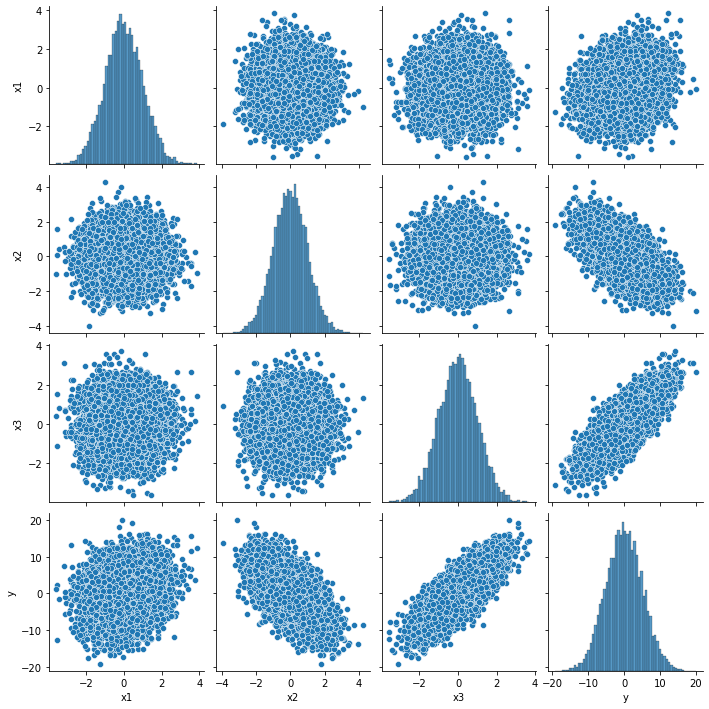

In [4]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Matriz de Diseño
X = np.random.normal(size=(N,3))
# Simulacion de Y
Y = np.matmul(X,np.array([1,-3,4]))

df = pd.DataFrame(data=X, columns=['x1','x2','x3'])
df['y'] = Y

sns.pairplot(df)

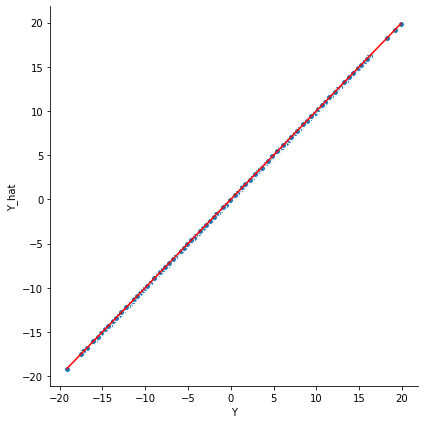

RMSE de prediccion 3.2466055865031876e-15
Los coeficientes de la regresion: [ 1. -3.  4.]
Intercepto: -1.3183898417423734e-16


In [6]:
foo_regresion(X,Y)

$y = x_1 - 3x_2 + 4x_3 + \epsilon$

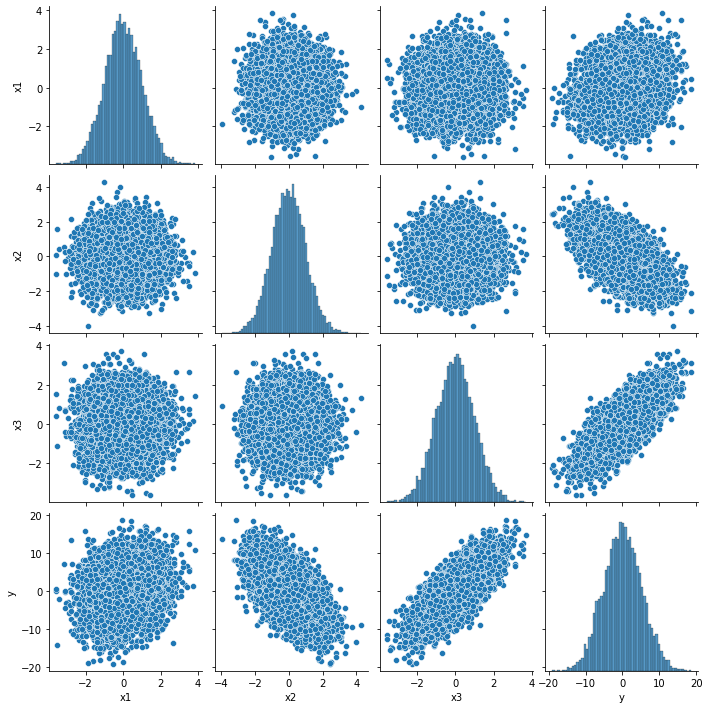

In [7]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000

# Matriz de Diseño
X = np.random.normal(size=(N,3))
eps = np.random.normal(0,1, size=(N,1))

# Simulacion de Y
Y = np.matmul(X,np.array([1,-3,4])).reshape((N,1)) + eps
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1','x2','x3'])
df['y'] = Y
sns.pairplot(df)

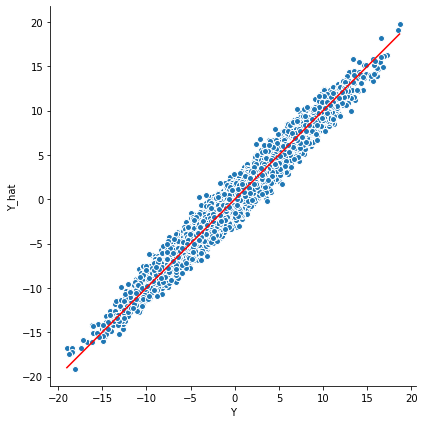

RMSE de prediccion 0.7947282459365101
Los coeficientes de la regresion: [ 0.99121978 -2.99059584  3.98941234]
Intercepto: -0.009854484630884505


In [ ]:
foo_regresion(X,Y)

## Ingenieria de Variables

y = $ \frac{1}{x} + \epsilon$

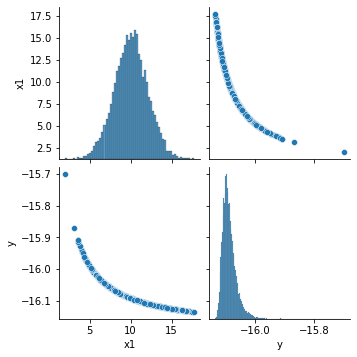

In [8]:
d# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Matriz de Diseño
X = np.random.normal(10,2,size=(N,1))
eps = np.random.normal(0,10)
# Simulacion de Y
Y = 1/X + eps
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

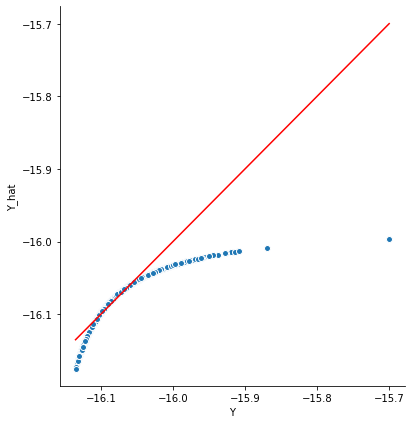

RMSE de prediccion 0.004877889744706031
Los coeficientes de la regresion: [-0.01140351]
Intercepto: -15.973147786267551


In [10]:
foo_regresion(X,Y)

In [12]:
X2

array([[12.21885928, 42.71161517, 28.14324799],
       [11.18543016, 37.40925295, 25.0151774 ],
       [11.64473911, 39.73696046, 26.39406917],
       ...,
       [11.67657664, 39.90003729, 26.49033065],
       [10.80422757, 35.51326357, 23.88498451],
       [12.30953003, 43.18791206, 28.42204327]])

1.5
1.3333333333333333


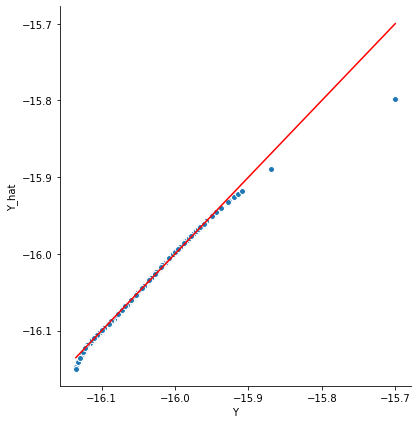

RMSE de prediccion 0.0005265643777608357
Los coeficientes de la regresion: [-0.54465583 -0.19699774  0.51158135]
Intercepto: -15.43761279700109


In [13]:
X2 = X.copy()

# ## Feature Eng
X2 = np.reshape(X2, (N,1))
for n in range(2,4):
    X2 = np.concatenate((X2,np.power(X2[:,0],1+1/n).reshape((N,1))), axis=1)
    print(1+1/n)
foo_regresion(X2,Y)

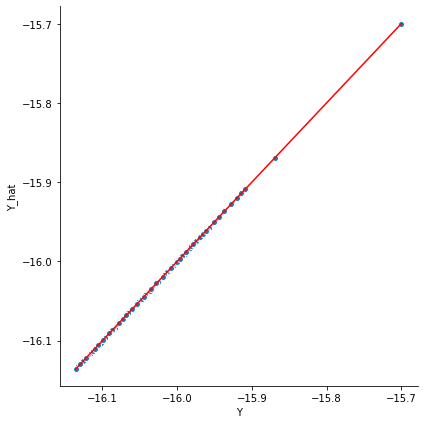

RMSE de prediccion 2.5757174171303633e-17
Los coeficientes de la regresion: [1.]
Intercepto: -16.191771136633786


In [14]:
X3 = X.copy()

# ## Feature Eng
X3 = 1/X3
foo_regresion(X3,Y)

$y = x + ln(x) + xln(x) + 1/x + x^{1.3}$

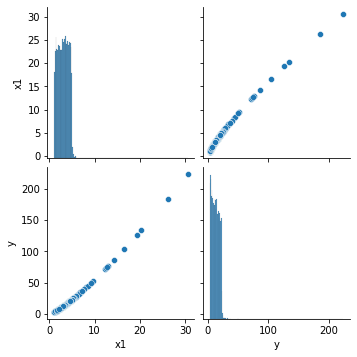

In [16]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))/100

# Generar Y
Y = X + np.log(X) + X*np.log(X) + 1/X + np.power(X,1.3)
Y = Y.reshape(-1)d


df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

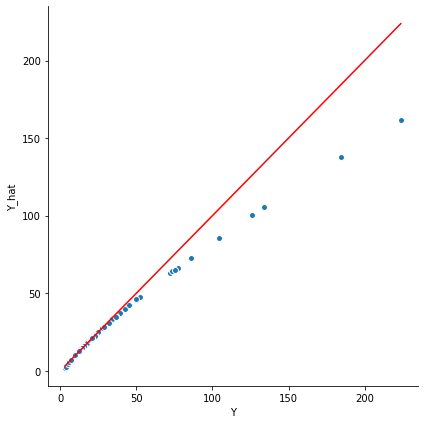

RMSE de prediccion 0.4395214198657493
Los coeficientes de la regresion: [5.42848563]
Intercepto: -4.044135211018926


In [18]:
foo_regresion(X,Y)

1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5


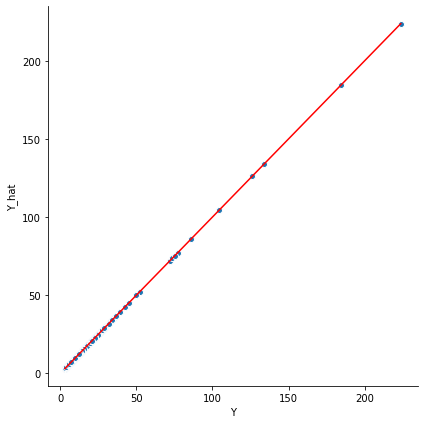

RMSE de prediccion 0.00010348002101566754
Los coeficientes de la regresion: [-2.32480706e+01  5.40327255e+01 -5.51011057e+01  3.56058211e+01
 -1.52522327e+01  4.40860849e+00 -8.51199430e-01  1.05214053e-01
 -7.52610198e-03  2.36799724e-04]
Intercepto: 3.3063630564417696


In [20]:
#Ingenieria de Variables
X2 = np.reshape(X, (N,1))
power = [1 + n/2 for n in range(1,10)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
    print(p)
foo_regresion(X2,Y)

$ y = sin(x) $

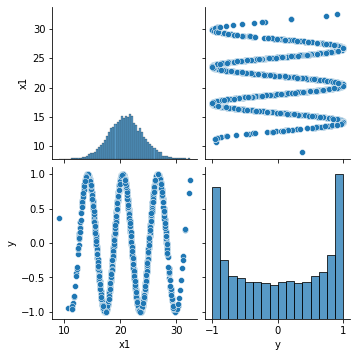

In [21]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Generar Xs
#X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))
X = np.random.normal(1,3,size=(N,1)) + 20
# Generar Y
Y = np.sin(X)
Y = Y.reshape(-1)

#Ingenieria de Variables
X = np.reshape(X, (N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

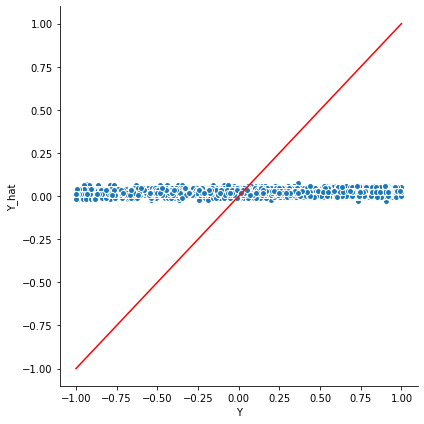

RMSE de prediccion 0.6331487868228455
Los coeficientes de la regresion: [-0.00446456]
Intercepto: 0.11735141468176233


In [22]:
foo_regresion(X,Y)

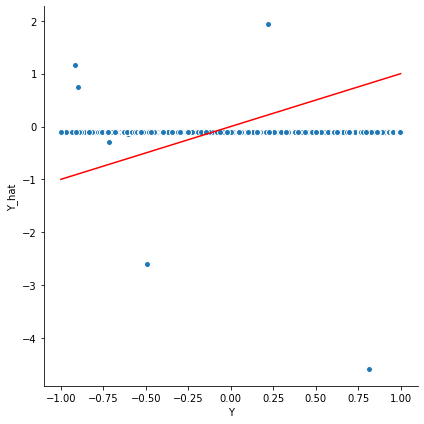

RMSE de prediccion 0.6583007955001167
Los coeficientes de la regresion: [ 9.71542961e-30  9.67430585e-29 -1.97965664e-30 ...  9.91488410e-55
  9.91486314e-55  9.91484222e-55]
Intercepto: -0.09594776069642173


In [32]:
dX2 = X.copy()
power = [1 + 1/n for n in range(1,1000)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
foo_regresion(X2,Y)

## Limites de Modelaje 

$ y = sin(x) $

Pero esta vez, $X$ tomara valores muy dispersos, osea tendra mucha varianza!

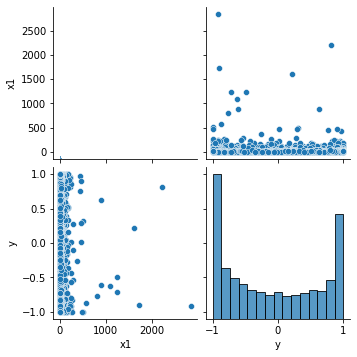

In [33]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))

# Generar Y
Y = np.sin(X)
Y = Y.reshape(-1)

#Ingenieria de Variables
X = np.reshape(X, (N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

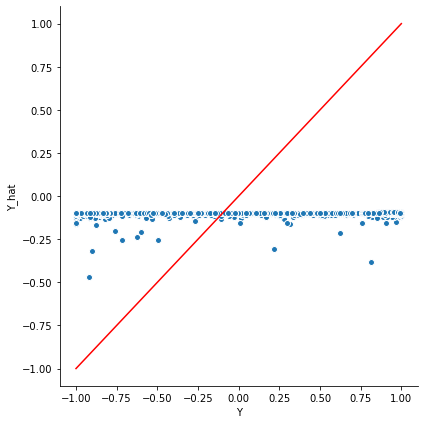

RMSE de prediccion 0.6572884811970667
Los coeficientes de la regresion: [-0.00013088]
Intercepto: -0.0948206855126066


In [34]:
foo_regresion(X,Y)

[1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9]


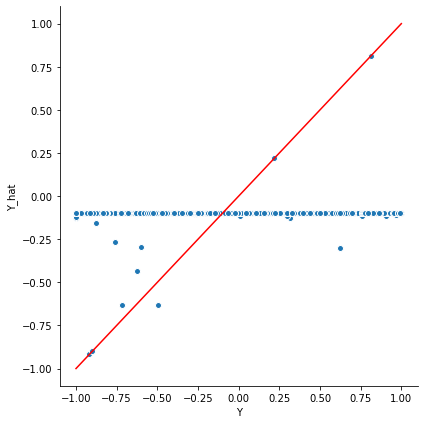

RMSE de prediccion 0.6569372323920666
Los coeficientes de la regresion: [-1.00875156e-27 -9.82990347e-28 -9.26919276e-28  4.25257054e-28
 -3.56540895e-28  2.00082072e-28 -2.05094857e-29 -3.86921766e-29
  0.00000000e+00 -3.30132449e-43 -6.17250448e-43 -1.15382898e-42
 -2.15636735e-42 -4.02900222e-42 -7.52586103e-42 -1.40536126e-41
 -2.62349938e-41 -4.89578549e-41 -9.13268912e-41 -1.70292529e-40
 -3.17393653e-40 -5.91277101e-40 -1.10092543e-39 -2.04871704e-39
 -3.81018337e-39 -7.08160223e-39 -1.31528601e-38 -2.44113872e-38
 -4.52718396e-38 -8.38892516e-38 -1.55312087e-37 -2.87277994e-37
 -5.30852828e-37 -9.79932418e-37 -1.80693633e-36 -3.32803386e-36
 -6.12213707e-36 -1.12475984e-35 -2.06361022e-35 -3.78072335e-35
 -6.91621020e-35 -1.26320128e-34 -2.30330399e-34 -4.19242782e-34
 -7.61683873e-34 -1.38113359e-33 -2.49921051e-33 -4.51261191e-33
 -8.12942776e-33 -1.46098065e-32 -2.61892833e-32 -4.68204680e-32
 -8.34670385e-32 -1.48351135e-31 -2.62837753e-31 -4.64113678e-31
 -8.16607222e-31 -

In [35]:
X2 = X.copy()
power = [1 + n/10 for n in range(1,100)]
print(power)
for p in power:
    X2 = np.concatenate((X2,np.power(X[:,0],p).reshape((N,1))), axis=1)
for p in power:
    X2 = np.concatenate((X2,np.power(X[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y)

$y =  x + ln(x) + xln(x) + 1/x + x^{1.3} + \epsilon_1*\epsilon_2$

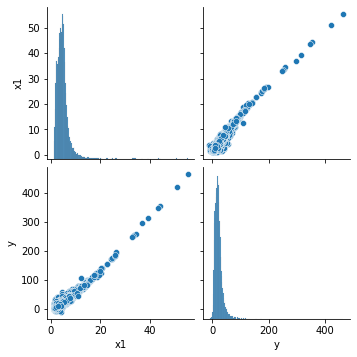

In [48]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,1,size=(N,1))
mean = [1,1]
cov = [[2,.3],[.3,5]] 
E = np.random.multivariate_normal(mean, cov, N)
# Generar Y
Y = X + np.log(X) + X*np.log(X) + 1/X + np.power(X,1.3) + (E[:,0]*E[:,1]).reshape((N,1))
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

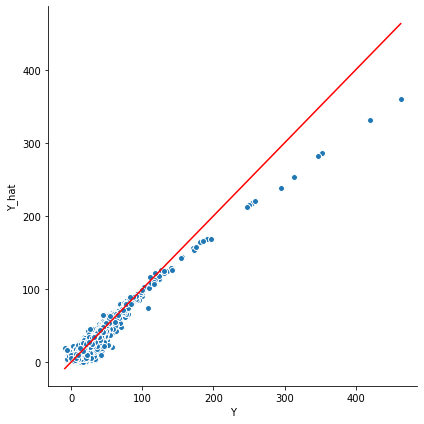

RMSE de prediccion 3.363706684030585
Los coeficientes de la regresion: [6.64933945]
Intercepto: -7.921469214482215


In [49]:
foo_regresion(X,Y)

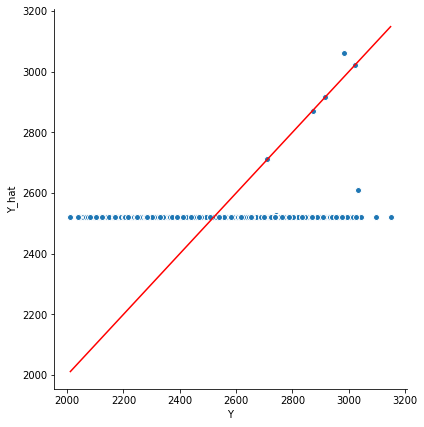

RMSE de prediccion 109.74528580178759
Los coeficientes de la regresion: [ 5.36084785e-073 -9.01979486e-073 -9.55545811e-076 -1.38304297e-080
 -3.31540536e-085  0.00000000e+000  3.40777924e-137  1.81165362e-136
  9.93825499e-136  5.57845261e-135  3.18418762e-134  1.84017543e-133
  1.07339189e-132  6.30600427e-132  3.72542763e-131  2.21074175e-130
  1.31668352e-129  7.86568522e-129  4.71081999e-128  2.82747818e-127
  1.70026108e-126  1.02409570e-125  6.17713559e-125  3.73062984e-124
  2.25560403e-123  1.36513172e-122  8.26930157e-122  5.01305152e-121
  3.04112934e-120  1.84599424e-119  1.12112548e-118  6.81199144e-118
  4.14055869e-117  2.51755443e-116  1.53110432e-115  9.31339866e-115
  5.66579693e-114  3.44695292e-113  2.09702422e-112  1.27566739e-111
  7.75906447e-111  4.71835777e-110  2.86848958e-109  1.74328094e-108
  1.05901804e-107  6.43029132e-107  3.90227484e-106  2.36664219e-105
  1.43430470e-104  8.68579538e-104  5.25534238e-103  3.17671326e-102
  1.91823224e-101  1.15698886e-

In [39]:
X2 = X.copy()

#Ingenieria de Variables
X2 = np.reshape(X2, (N,1))
power = [1 + n/2 for n in range(1,100)]
for p in power:
    X2 = np.concatenate((X2,np.power(X[:,0],p).reshape((N,1))), axis=1)
# for p in power:
#     X2 = np.concatenate((X2,np.power(X[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y)

$y = x_1 + \epsilon_1*\epsilon_2$

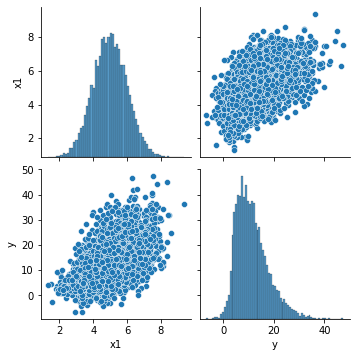

In [46]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Matriz de Diseño
mean = [5,2,3]
cov = [[1,.5,.5],[.5,2,.5],[.5,.5,2]] 
X = np.random.multivariate_normal(mean, cov, N)


# Simulacion de Y
Y = X[:,0] + X[:,1]*X[:,2]
Y = Y.reshape(-1)
X = X[:,0]
X = X.reshape((N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

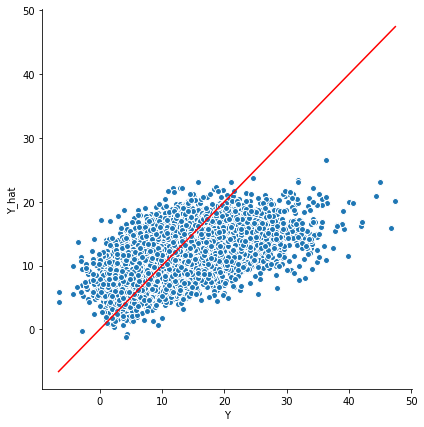

RMSE de prediccion 4.169746507744684
Los coeficientes de la regresion: [3.43781377]
Intercepto: -5.730691914942133


In [45]:
foo_regresion(X,Y)

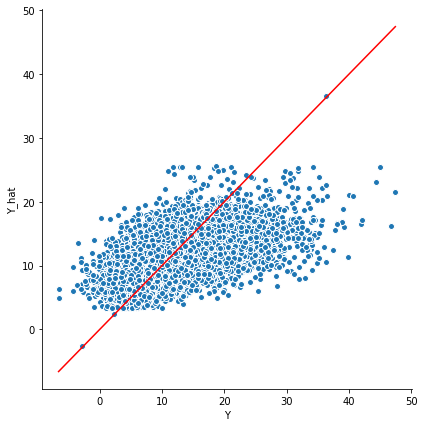

RMSE de prediccion 4.1612359319068695
Los coeficientes de la regresion: [ 1.93853278e+08  6.33113017e+08 -1.32701138e+09  1.17476107e+09
 -6.24769660e+08  2.18195710e+08 -5.08630612e+07  7.67398570e+06
 -6.81148651e+05  2.71034563e+04  1.64346766e+09 -1.54898157e+09
 -1.07930059e+09  1.15529518e+09  1.33393454e+09 -9.11540513e+08
 -1.56321205e+09  1.76155187e+09 -5.06901631e+08]
Intercepto: -508656328.5467164


In [47]:
X2 = X.copy()

#Ingenieria de Variables
power = [1 + n/2 for n in range(1,10)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y)

# Train y Test

Ahora, separemos nuestros datos en train y test. Como estamos en el mundo **i.i.d** y no series de tiempo o panel. Podemos elegir el train y test de manera completamente aleatoria.

In [ ]:
from sklearn.model_selection import train_test_split

def test_regresion(X,Y):

    # Train y Test
    X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)
    
    
    # ### Regresion lineal
    regresion = linear_model.LinearRegression()
    # Entrenamiento
    regresion.fit(X_train,Y_train)
    # Predicciones
    Y_hat = regresion.predict(X_test)
    Y_hat_train = regresion.predict(X_train)
    # Error
    error_test = np.sqrt(np.square(np.subtract(Y_hat,Y_test))) 
    error_train = np.sqrt(np.square(np.subtract(Y_hat_train,Y_train))) 
    df = pd.DataFrame(data={'Y_hat':Y_hat, 'Y':Y_test})
    
    # ## Plots
    X_plot = np.linspace(Y_test.min(), Y_test.max(), 100)
    Y_plot = X_plot
    g = sns.FacetGrid(df, size = 6)
    g = g.map(plt.scatter, "Y", "Y_hat", edgecolor="w")
    plt.plot(X_plot, Y_plot, color='r')
    plt.show()

    print(f'Train RMSE de prediccion {error_test.mean()}')
    print(f'Test RMSE de prediccion {error_train.mean()}')
    print(f'Los coeficientes de la regresion: {regresion.coef_}')
    print(f'Intercepto: {regresion.intercept_}')

$y = x + 5x^2 + 6x^3 + n^4\epsilon$

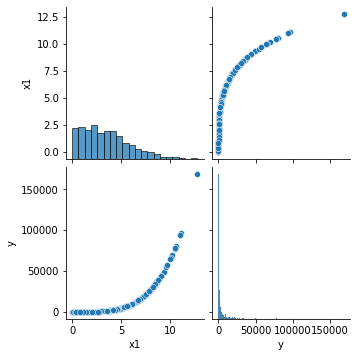

In [ ]:
# Semilla para replicacion de resultados
np.random.seed(58)
N = 1000
# Matriz de Diseño
X = np.random.normal(3,3,size=(N,1))
eps = np.random.normal(3,2)
X = np.abs(X)
# Simulacion de Y
Y = Y = X + 5*np.power(X,2) + 6*np.power(X,3) + np.power(X,4)*eps
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

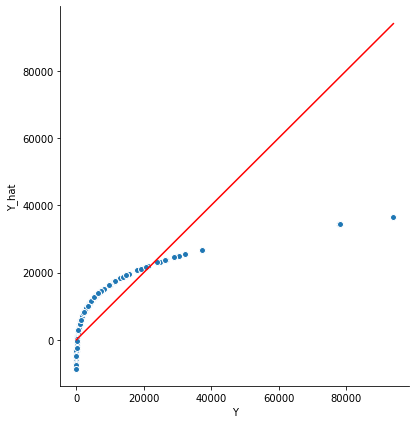

Train RMSE de prediccion 5162.972550344554
Test RMSE de prediccion 5303.506154629384
Los coeficientes de la regresion: [4118.88710222]
Intercepto: -8893.372794292844


In [ ]:
test_regresion(X,Y)

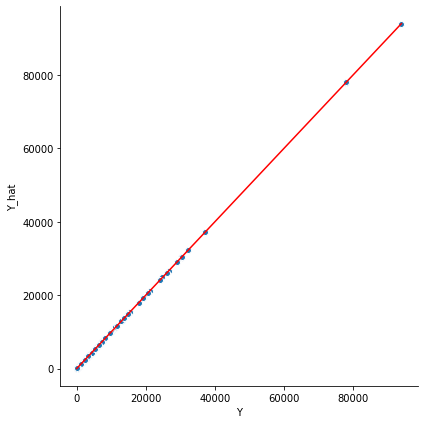

Train RMSE de prediccion 2.498607015732901e-12
Test RMSE de prediccion 2.79918231172252e-12
Los coeficientes de la regresion: [1.         5.         6.         5.83355704]
Intercepto: -1.8189894035458565e-12


In [ ]:
X2 = X.copy()

#Ingenieria de Variables
power = [2,3,4]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)

test_regresion(X2,Y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


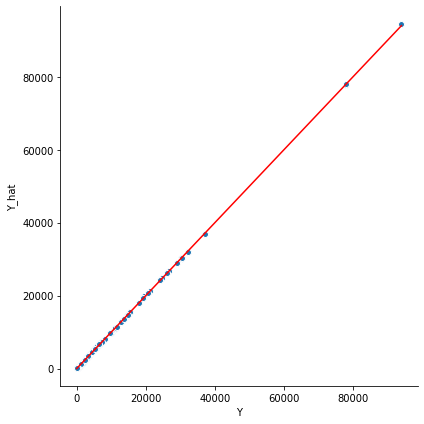

Train RMSE de prediccion 129.32419982503706
Test RMSE de prediccion 131.98107289045174
Los coeficientes de la regresion: [ 1.25915750e-06  8.88907331e-04  1.11958688e-06  2.33606220e-05
  8.41236305e-05  2.82504786e-04  8.76334042e-04  2.45269803e-03
  5.94260762e-03  1.15502942e-02  1.51274962e-02  5.82584409e-03
 -1.34398371e-02  6.30956347e-03 -1.50884281e-03  2.15964874e-04
 -1.93328863e-05  1.06536985e-06 -3.31639281e-08  4.47345006e-10]
Intercepto: 167.60136885226075


In [ ]:
X3 = X.copy()

#Ingenieria de Variables
power = [n for n in range(1,20)]
print(power)
for p in power:
    X3 = np.concatenate((X3,np.power(X[:,0],p).reshape((N,1))), axis=1)

test_regresion(X3,Y)

# Regularizacion y Validacion

Ahora estudiaremos como funciona la regularizacion, y como se ve la convergencia de los parametros.

Basado en [este codigo](https://colab.research.google.com/github/cvxgrp/cvxpy/blob/master/examples/machine_learning/ridge_regression.ipynb#scrollTo=MHUqiFdmw6-y).

In [ ]:
import cvxpy as cp

In [ ]:
def fun_perdida(X, Y, beta):
    return cp.pnorm(cp.matmul(X, beta) - Y, p=2)**2

def penalizacion(beta):
    return cp.pnorm(beta, p=2)**2

def fun_objetivo(X, Y, beta, lambd):
    return fun_perdida(X, Y, beta) + lambd * penalizacion(beta)

def mse(X, Y, beta):
    return (1.0 / X.shape[0]) * fun_perdida(X, Y, beta).value

In [ ]:
def generate_data(m=100, n=20, sigma=5):
    "Generates data matrix X and observations Y."
    np.random.seed(8939)
    beta_star =  np.random.lognormal(0,1,size=(n,))*5
    X = np.random.normal(10,1,size=(m, n))
    eps = np.random.normal(10,1,size=m)
    Y = X.dot(beta_star) + eps
    return X, Y , beta_star

In [ ]:
def plot_errors(train_errors, val_errors, test_errors, lambd_values):
    sns.lineplot(lambd_values, train_errors, label="Train error")
    sns.lineplot(lambd_values, val_errors, label="Val error")
    sns.lineplot(lambd_values, test_errors, label="Test error")
    plt.xscale("log")
    plt.legend(loc="upper left")
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.title("Mean Squared Error (MSE)")
    lmb_opt = val_errors.index(min(val_errors))
    lmb_opt = lambd_values[lmb_opt]
    test_opt = test_errors.index(min(test_errors))
    test_opt = lambd_values[test_opt]
    plt.axvline(lmb_opt, color='orange')
    plt.axvline(test_opt, color='g')
    plt.show()

In [ ]:
def plot_regularization_path(lambd_values, beta_values):
    num_coeffs = len(beta_values[0])
    for i in range(num_coeffs):
        sns.lineplot(lambd_values, [wi[i] for wi in beta_values])
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.xscale("log")
    plt.title("Regularization Path")
    plt.show()
    

Modelo real:  
$y = X\beta + \epsilon$  
$\beta \in \mathcal{R}^n$  
 $X \in \mathcal{R}^{m \times n}$
  
Modelo $\hat{f}$ propuesto:  
$\hat{f} = X\beta + X^2\beta^I +  
X^{\frac{1}{2}}\beta^{II} + \epsilon$

En este caso agregamos transformaciones de variables cubicas y raices a nuestro modelo. Aunque, originalemnte no existian.

In [ ]:
m = 200
n = 5
noise = 3
sigma = 5


X, Y, real_beta = generate_data(m, n, sigma)

# Creacion de Ruido
n_ = n
# X_noise = np.random.normal(1,5, size=(m,noise))
# X = np.concatenate((X, X_noise), axis=1)
#real_beta = np.concatenate((real_beta, np.zeros(noise)))
# n = n +noise
# ### Transformaciones cubicas y raiz.
for x in range(0,n):
    X = np.concatenate((X,np.power(X[:,x],3).reshape((m,1))), axis=1)
for x in range(0,n):
    X = np.concatenate((X,np.power(X[:,x],.5).reshape((m,1))), axis=1)

real_beta = np.concatenate((real_beta, np.zeros( X.shape[1]-n)))
n = X.shape[1]


# df = pd.DataFrame(X_t[:,0:n_])
# df['y'] = Y_t
# sns.pairplot(df)

Plateemos el problema de optimizacion:

In [ ]:
# Split Test Train
X_t, X_test, Y_t, Y_test = train_test_split(
X, Y, test_size=0.2, random_state=48)
# Split Train Validation
X_train, X_val, Y_train, Y_val = train_test_split(
X_t, Y_t, test_size=0.5, random_state=420)

# Numero de betas
beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(fun_objetivo(X_train, Y_train, beta, lambd)))

lambd_values = np.logspace(-10, 1, 100)
train_errors = []
val_errors = []
test_errors = []
beta_values = []
# Resolver regresion lineal para cada lambda
for v in lambd_values:
    lambd.value = v
    problem.solve()
    train_errors.append(mse(X_train, Y_train, beta))
    val_errors.append(mse(X_val, Y_val, beta))
    test_errors.append(mse(X_test, Y_test, beta))
    beta_values.append(beta.value)

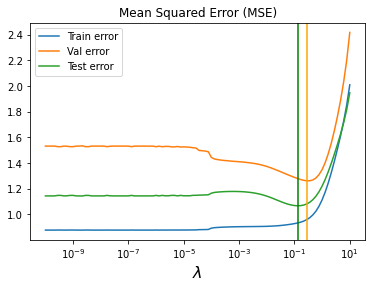

In [ ]:
plot_errors(train_errors, val_errors, test_errors, lambd_values)

Dinamica de las $\beta$ dependiendo del valor de $\lambda$

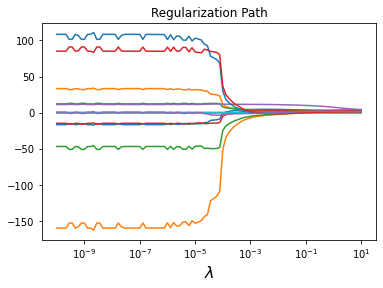

In [ ]:
plot_regularization_path(lambd_values, beta_values)

$\beta^*$ optima vs. $\beta$ real

Lambda Optima: 0.2782559402207126


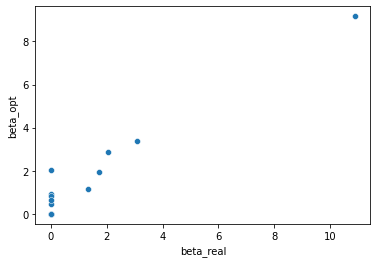

In [ ]:
lmb_opt = val_errors.index(min(val_errors))
print(f'Lambda Optima: {lambd_values[lmb_opt]}')
betas = pd.DataFrame({'beta_real':real_beta,'beta_opt':beta_values[lmb_opt]})
sns.scatterplot(data=betas, y='beta_opt', x='beta_real')

Lambda Optima: 0.12915496650148828


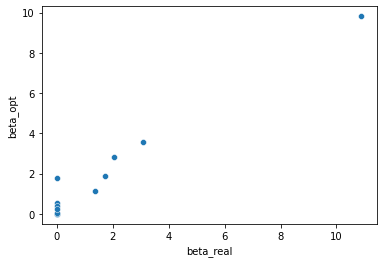

In [ ]:
lmb_opt = test_errors.index(min(test_errors))
print(f'Lambda Optima: {lambd_values[lmb_opt]}')
betas = pd.DataFrame({'beta_real':real_beta,'beta_opt':beta_values[lmb_opt]})
sns.scatterplot(data=betas, y='beta_opt', x='beta_real')